# Hypotheses 1
Pull requests by male contributors are reviewed and merged faster than pull requests by female contributors.

In [42]:
import pandas as pd
import matplotlib.pyplot as plt
from scipy.stats import shapiro, kruskal
from cliffs_delta import cliffs_delta

In [43]:
merged_data = pd.read_csv('./data/merged_data.csv', header=0)
merged_data

,id,project_id,ownername,reponame,merged_or_not,lifetime_minutes,mergetime_minutes,num_commits,src_churn,test_churn,...,num_code_comments,num_code_comments_con,integrator_availability,friday_effect,contrib_rate_author,reopen_or_not,first_close_minutes,reopen_num,log_mergetime_minutes,log_lifetime_minutes
0,52,22091370,kubernetes,kubernetes,1,627,627.0,1,8,19,...,0,0,0.0,0,0.000459,0,627,0,6.442540,6.442540
1,60,22091370,kubernetes,kubernetes,1,2760,2760.0,1,10,75,...,3,0,0.0,1,0.021057,0,2760,0,7.923348,7.923348
2,93,1486,ansible,ansible,1,4971,4971.0,4,14,0,...,6,2,64.0,0,0.000088,0,4971,0,8.511577,8.511577
3,101,5219,scikit-learn,scikit-learn,1,4040,4040.0,4,4,92,...,3,1,3.0,0,0.109291,0,4040,0,8.304247,8.304247
4,119,3905191,facebook,react,1,3609,3609.0,1,5,0,...,0,0,91.0,0,0.000000,0,3609,0,8.191463,8.191463
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
67652,3347524,1486,ansible,ansible,1,100,100.0,1,4,0,...,0,0,3.0,0,0.010687,0,100,0,4.615121,4.615121
67653,3347645,1486,ansible,ansible,1,487,487.0,2,8,0,...,0,0,67.0,0,0.008142,0,487,0,6.190315,6.190315
67654,3347815,48212908,pandas-dev,pandas,1,63531,63531.0,215,9804,13464,...,17,3,7.0,0,0.000274,1,10204,1,11.059299,11.059299
67655,3347882,20078281,nodejs,node,1,11373,11373.0,4,16,0,...,0,0,197.0,0,0.012812,0,11373,0,9.339085,9.339085


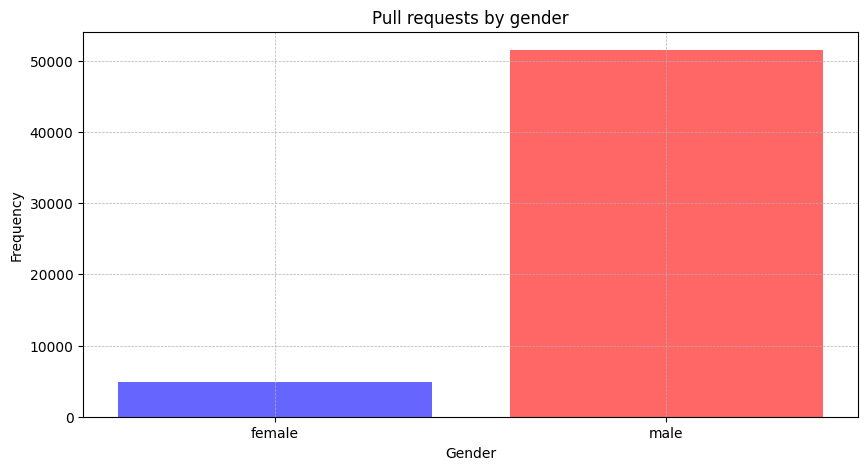

In [44]:
# see how many pull requests have been merged by contributor gender
gender = merged_data['contrib_gender'].value_counts().sort_index()

plt.figure(figsize=(10, 5))
plt.bar(gender.index, gender.values, alpha=0.6, color=['blue', 'red'])
plt.xticks(gender.index, ['female', 'male'])
plt.xlabel('Gender')
plt.ylabel('Frequency')
plt.grid(True, which="both", ls="--", linewidth=0.5)
plt.title('Pull requests by gender')
plt.show()

male = merged_data[merged_data['contrib_gender'] == 'male']
female = merged_data[merged_data['contrib_gender'] == 'female']

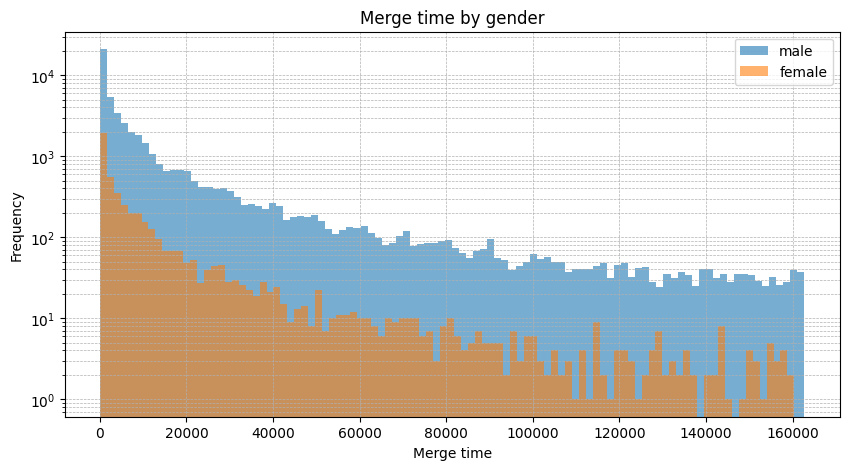

Shapiro-Wilk test for male contributors, merge time in minutes: W = 0.5637293184982206, p = 9.126285930024977e-75
Shapiro-Wilk test for female contributors, merge time in minutes: W = 0.553389646424704, p = 2.967087456286778e-75
Kruskal-Wallis H test, merge time in minutes: H = 0.013598405919699495, p = 0.9071673670037997
Mean merge time for male contributors: 14004.341805825243
Mean merge time for female contributors: 12858.376442015786
Median merge time for male contributors: 3038.5
Median merge time for female contributors: 3150.0
Standard deviation of merge time for male contributors: 26538.013657784548
Standard deviation of merge time for female contributors: 24590.799911450285
Maximum merge time for male contributors: 162737.0
Maximum merge time for female contributors: 160421.0
Minimum merge time for male contributors: 16.0
Minimum merge time for female contributors: 16.0


In [45]:
# 1. merge time in minutes
plt.figure(figsize=(10, 5))
plt.hist(male['mergetime_minutes'], bins=100, alpha=0.6, label='male', log=True)
plt.hist(female['mergetime_minutes'], bins=100, alpha=0.6, label='female', log=True)
plt.xlabel('Merge time')
plt.ylabel('Frequency')
plt.legend()
plt.grid(True, which="both", ls="--", linewidth=0.5)
plt.title('Merge time by gender')
plt.show()

sample_size = 4500
male_sample = male['mergetime_minutes'].sample(n=sample_size, random_state=1)
female_sample = female['mergetime_minutes'].sample(n=sample_size, random_state=1)

res_male = shapiro(male_sample)
res_female = shapiro(female_sample)
print('Shapiro-Wilk test for male contributors, merge time in minutes: W = {}, p = {}'.format(res_male.statistic, res_male.pvalue))
print('Shapiro-Wilk test for female contributors, merge time in minutes: W = {}, p = {}'.format(res_female.statistic, res_female.pvalue))

H, p = kruskal(male['mergetime_minutes'], female['mergetime_minutes'])
print('Kruskal-Wallis H test, merge time in minutes: H = {}, p = {}'.format(H, p))

if p < 0.05:
    delta, res = cliffs_delta(male['mergetime_minutes'], female['mergetime_minutes'])
    print('Cliff\'s delta: {}, interpretation: {}'.format(delta, res))

print('Mean merge time for male contributors: {}'.format(male['mergetime_minutes'].mean()))
print('Mean merge time for female contributors: {}'.format(female['mergetime_minutes'].mean()))
print('Median merge time for male contributors: {}'.format(male['mergetime_minutes'].median()))
print('Median merge time for female contributors: {}'.format(female['mergetime_minutes'].median()))
print('Standard deviation of merge time for male contributors: {}'.format(male['mergetime_minutes'].std()))
print('Standard deviation of merge time for female contributors: {}'.format(female['mergetime_minutes'].std()))
print('Maximum merge time for male contributors: {}'.format(male['mergetime_minutes'].max()))
print('Maximum merge time for female contributors: {}'.format(female['mergetime_minutes'].max()))
print('Minimum merge time for male contributors: {}'.format(male['mergetime_minutes'].min()))
print('Minimum merge time for female contributors: {}'.format(female['mergetime_minutes'].min()))

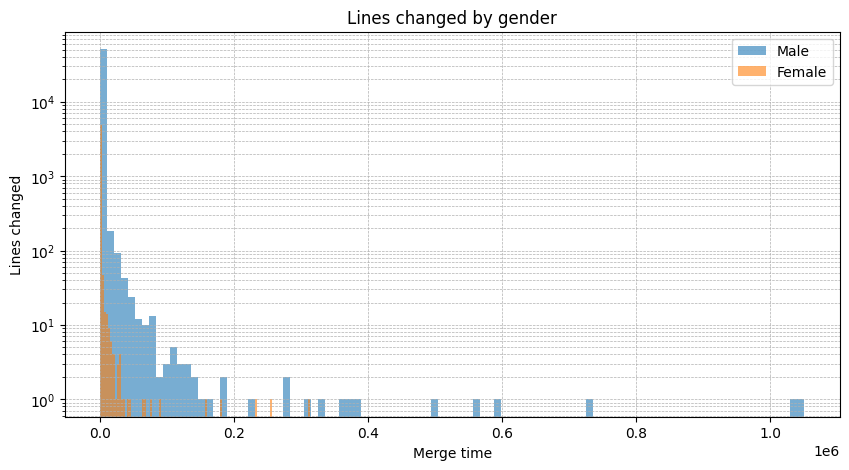

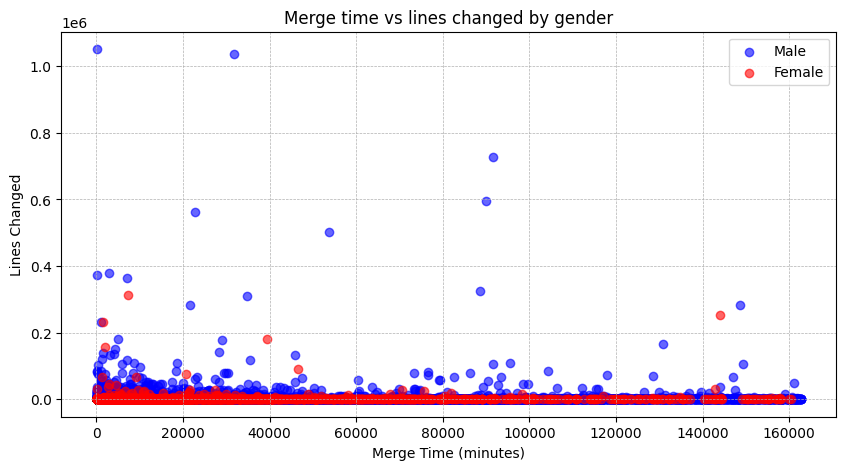

Shapiro-Wilk test for male contributors, number of lines changed: W = 0.044322198420993386, p = 5.509684477914029e-92
Shapiro-Wilk test for female contributors, number of lines changed: W = 0.04601354656005363, p = 6.054475950161356e-92
Kruskal-Wallis H test, number of lines changed: H = 26.039464680916595, p = 3.345092074005345e-07
Cliff's delta: 0.04385714931335389, interpretation: negligible
Mean lines changed for male contributors: 611.4859223300971
Mean lines changed for female contributors: 649.9113539769278
Median lines changed for male contributors: 30.0
Median lines changed for female contributors: 25.0
Standard deviation of lines changed for male contributors: 10057.464884541261
Standard deviation of lines changed for female contributors: 7997.867022016363
Maximum lines changed for male contributors: 1051094
Maximum lines changed for female contributors: 313140
Minimum lines changed for male contributors: 1
Minimum lines changed for female contributors: 1


In [46]:
# 2. lines changed
plt.figure(figsize=(10, 5))
plt.hist(male['src_churn'], bins=100, alpha=0.6, label='Male', log=True)
plt.hist(female['src_churn'], bins=100, alpha=0.6, label='Female', log=True)
plt.xlabel('Merge time')
plt.ylabel('Lines changed')
plt.legend()
plt.grid(True, which="both", ls="--", linewidth=0.5)
plt.title('Lines changed by gender')
plt.show()

plt.figure(figsize=(10, 5))
plt.scatter(male['mergetime_minutes'], male['src_churn'], alpha=0.6, color='blue', label='Male')
plt.scatter(female['mergetime_minutes'], female['src_churn'], alpha=0.6, color='red', label='Female')
plt.xlabel('Merge Time (minutes)')
plt.ylabel('Lines Changed')
plt.title('Merge time vs lines changed by gender')
plt.legend()
plt.grid(True, which="both", ls="--", linewidth=0.5)
plt.show()

sample_size = 4500
male_sample = male['src_churn'].sample(n=sample_size, random_state=1)
female_sample = female['src_churn'].sample(n=sample_size, random_state=1)

res_male = shapiro(male_sample)
res_female = shapiro(female_sample)
print('Shapiro-Wilk test for male contributors, number of lines changed: W = {}, p = {}'.format(res_male.statistic, res_male.pvalue))
print('Shapiro-Wilk test for female contributors, number of lines changed: W = {}, p = {}'.format(res_female.statistic, res_female.pvalue))

H, p = kruskal(male['src_churn'], female['src_churn'])
print('Kruskal-Wallis H test, number of lines changed: H = {}, p = {}'.format(H, p))

if p < 0.05:
    delta, res = cliffs_delta(male['src_churn'], female['src_churn'])
    print('Cliff\'s delta: {}, interpretation: {}'.format(delta, res))

print('Mean lines changed for male contributors: {}'.format(male['src_churn'].mean()))
print('Mean lines changed for female contributors: {}'.format(female['src_churn'].mean()))
print('Median lines changed for male contributors: {}'.format(male['src_churn'].median()))
print('Median lines changed for female contributors: {}'.format(female['src_churn'].median()))
print('Standard deviation of lines changed for male contributors: {}'.format(male['src_churn'].std()))
print('Standard deviation of lines changed for female contributors: {}'.format(female['src_churn'].std()))
print('Maximum lines changed for male contributors: {}'.format(male['src_churn'].max()))
print('Maximum lines changed for female contributors: {}'.format(female['src_churn'].max()))
print('Minimum lines changed for male contributors: {}'.format(male['src_churn'].min()))
print('Minimum lines changed for female contributors: {}'.format(female['src_churn'].min()))

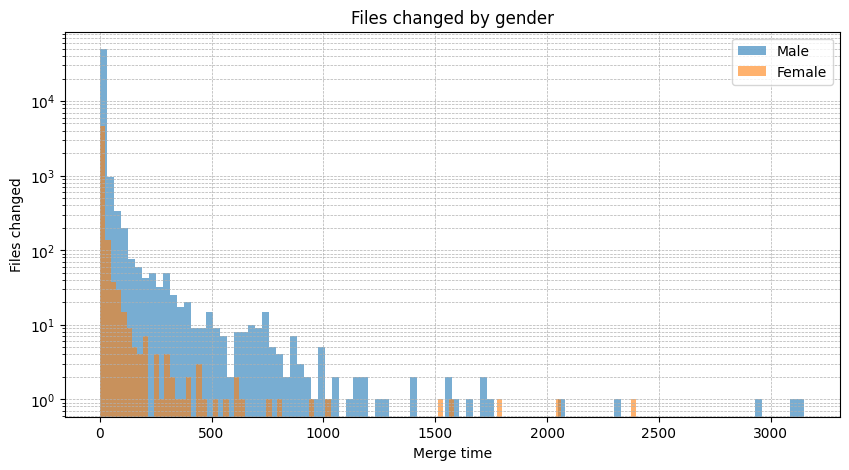

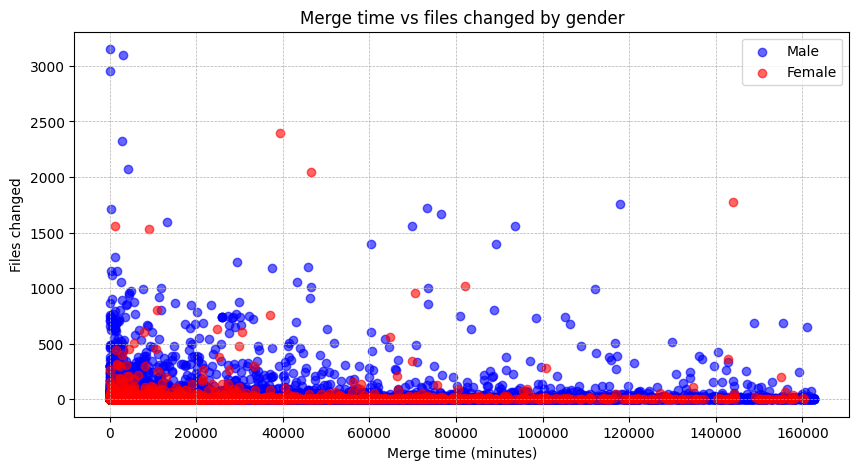

Shapiro-Wilk test for male contributors, number of files changed: W = 0.08254862058191181, p = 4.8135028154204016e-91
Shapiro-Wilk test for female contributors, number of files changed: W = 0.09461615917559119, p = 9.699019567002008e-91
Kruskal-Wallis H test, number of files changed: H = 3.138466082776717, p = 0.07646569051315213
Mean files changed for male contributors: 9.50473786407767
Mean files changed for female contributors: 10.843553936450112
Median files changed for male contributors: 2.0
Median files changed for female contributors: 2.0
Standard deviation of files changed for male contributors: 55.52658998237687
Standard deviation of files changed for female contributors: 72.57389375035369
Maximum files changed for male contributors: 3150
Maximum files changed for female contributors: 2399
Minimum files changed for male contributors: 1
Minimum files changed for female contributors: 1


In [47]:
# 3. files changed
plt.figure(figsize=(10, 5))
plt.hist(male['files_changed'], bins=100, alpha=0.6, label='Male', log=True)
plt.hist(female['files_changed'], bins=100, alpha=0.6, label='Female', log=True)
plt.xlabel('Merge time')
plt.ylabel('Files changed')
plt.legend()
plt.grid(True, which="both", ls="--", linewidth=0.5)
plt.title('Files changed by gender')
plt.show()

plt.figure(figsize=(10, 5))
plt.scatter(male['mergetime_minutes'], male['files_changed'], alpha=0.6, color='blue', label='Male')
plt.scatter(female['mergetime_minutes'], female['files_changed'], alpha=0.6, color='red', label='Female')
plt.xlabel('Merge time (minutes)')
plt.ylabel('Files changed')
plt.title('Merge time vs files changed by gender')
plt.legend()
plt.grid(True, which="both", ls="--", linewidth=0.5)
plt.show()

sample_size = 4500
male_sample = male['files_changed'].sample(n=sample_size, random_state=1)
female_sample = female['files_changed'].sample(n=sample_size, random_state=1)

res_male = shapiro(male_sample)
res_female = shapiro(female_sample)
print('Shapiro-Wilk test for male contributors, number of files changed: W = {}, p = {}'.format(res_male.statistic, res_male.pvalue))
print('Shapiro-Wilk test for female contributors, number of files changed: W = {}, p = {}'.format(res_female.statistic, res_female.pvalue))

H, p = kruskal(male['files_changed'], female['files_changed'])
print('Kruskal-Wallis H test, number of files changed: H = {}, p = {}'.format(H, p))

if p < 0.05:
    delta, rest = cliffs_delta(male['files_changed'], female['files_changed'])
    print('Cliff\'s delta: {}, interpretation: {}'.format(delta, res))

print('Mean files changed for male contributors: {}'.format(male['files_changed'].mean()))
print('Mean files changed for female contributors: {}'.format(female['files_changed'].mean()))
print('Median files changed for male contributors: {}'.format(male['files_changed'].median()))
print('Median files changed for female contributors: {}'.format(female['files_changed'].median()))
print('Standard deviation of files changed for male contributors: {}'.format(male['files_changed'].std()))
print('Standard deviation of files changed for female contributors: {}'.format(female['files_changed'].std()))
print('Maximum files changed for male contributors: {}'.format(male['files_changed'].max()))
print('Maximum files changed for female contributors: {}'.format(female['files_changed'].max()))
print('Minimum files changed for male contributors: {}'.format(male['files_changed'].min()))
print('Minimum files changed for female contributors: {}'.format(female['files_changed'].min()))

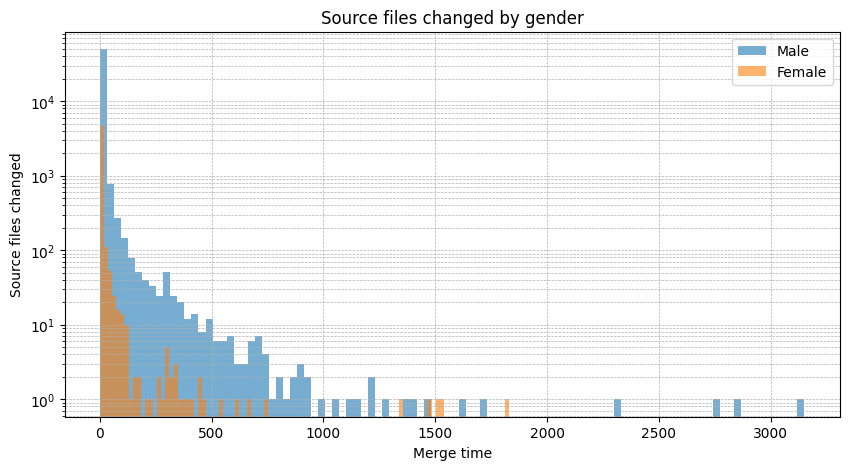

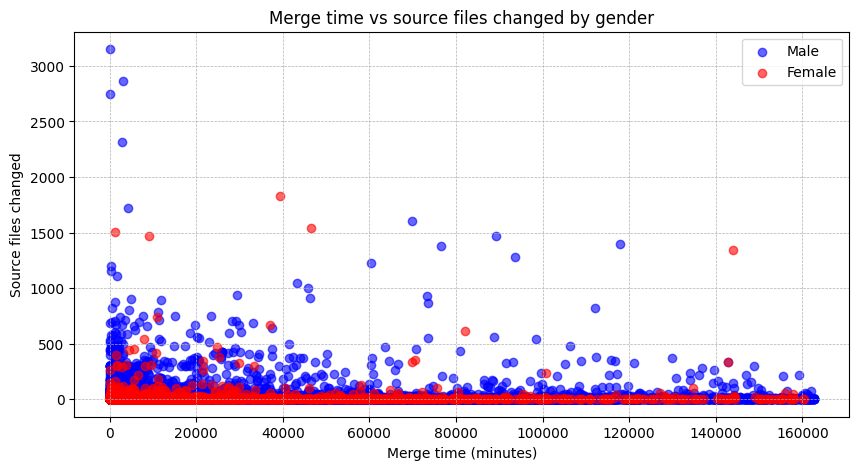

Shapiro-Wilk test for male contributors, number of source files changed: W = 0.07533456483285539, p = 3.1785545519212985e-91
Shapiro-Wilk test for female contributors, number of source files changed: W = 0.0928709127593439, p = 8.760040777592758e-91
Kruskal-Wallis H test, number of source files changed: H = 1.228943819470323, p = 0.2676125383936671
Mean source files changed for male contributors: 7.558640776699029
Mean source files changed for female contributors: 8.567496458206842
Median source files changed for male contributors: 2.0
Median source files changed for female contributors: 2.0
Standard deviation of source files changed for male contributors: 45.74394976468122
Standard deviation of source files changed for female contributors: 58.2058067486168
Maximum source files changed for male contributors: 3150
Maximum source files changed for female contributors: 1831
Minimum source files changed for male contributors: 1
Minimum source files changed for female contributors: 1


In [48]:
# 4. source files changed
plt.figure(figsize=(10, 5))
plt.hist(male['src_files'], bins=100, alpha=0.6, label='Male', log=True)
plt.hist(female['src_files'], bins=100, alpha=0.6, label='Female', log=True)
plt.xlabel('Merge time')
plt.ylabel('Source files changed')
plt.legend()
plt.grid(True, which="both", ls="--", linewidth=0.5)
plt.title('Source files changed by gender')
plt.show()

plt.figure(figsize=(10, 5))
plt.scatter(male['mergetime_minutes'], male['src_files'], alpha=0.6, color='blue', label='Male')
plt.scatter(female['mergetime_minutes'], female['src_files'], alpha=0.6, color='red', label='Female')
plt.xlabel('Merge time (minutes)')
plt.ylabel('Source files changed')
plt.title('Merge time vs source files changed by gender')
plt.legend()
plt.grid(True, which="both", ls="--", linewidth=0.5)
plt.show()

sample_size = 4500
male_sample = male['src_files'].sample(n=sample_size, random_state=1)
female_sample = female['src_files'].sample(n=sample_size, random_state=1)

res_male = shapiro(male_sample)
res_female = shapiro(female_sample)
print('Shapiro-Wilk test for male contributors, number of source files changed: W = {}, p = {}'.format(res_male.statistic, res_male.pvalue))
print('Shapiro-Wilk test for female contributors, number of source files changed: W = {}, p = {}'.format(res_female.statistic, res_female.pvalue))

H, p = kruskal(male['src_files'], female['src_files'])
print('Kruskal-Wallis H test, number of source files changed: H = {}, p = {}'.format(H, p))

if p < 0.05:
    delta, res = cliffs_delta(male['src_files'], female['src_files'])
    print('Cliff\'s delta: {}, interpretation: {}'.format(delta, res))

print('Mean source files changed for male contributors: {}'.format(male['src_files'].mean()))
print('Mean source files changed for female contributors: {}'.format(female['src_files'].mean()))
print('Median source files changed for male contributors: {}'.format(male['src_files'].median()))
print('Median source files changed for female contributors: {}'.format(female['src_files'].median()))
print('Standard deviation of source files changed for male contributors: {}'.format(male['src_files'].std()))
print('Standard deviation of source files changed for female contributors: {}'.format(female['src_files'].std()))
print('Maximum source files changed for male contributors: {}'.format(male['src_files'].max()))
print('Maximum source files changed for female contributors: {}'.format(female['src_files'].max()))
print('Minimum source files changed for male contributors: {}'.format(male['src_files'].min()))
print('Minimum source files changed for female contributors: {}'.format(female['src_files'].min()))

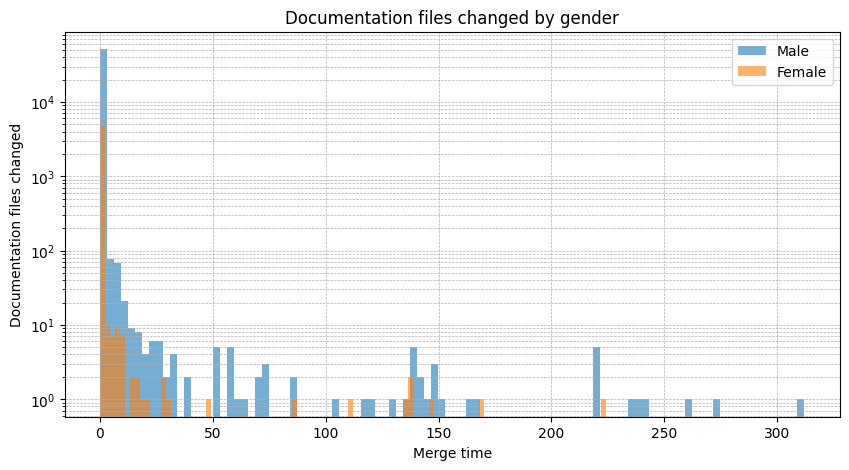

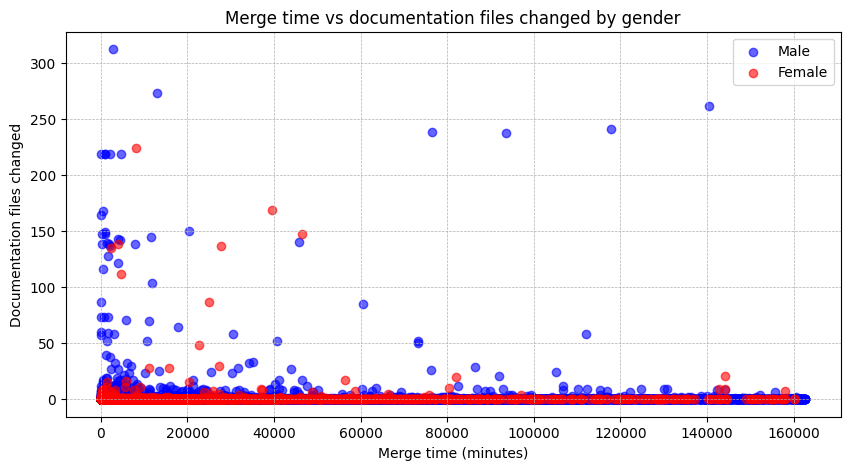

Shapiro-Wilk test for male contributors, number of documentation files changed: W = 0.02366282111075968, p = 1.7618510830540706e-92
Shapiro-Wilk test for female contributors, number of documentation files changed: W = 0.030600326675460754, p = 2.5776121891680707e-92
Kruskal-Wallis H test, number of documentation files changed: H = 0.46206738798507035, p = 0.4966593584175125
Mean documentation files changed for male contributors: 0.1894368932038835
Mean documentation files changed for female contributors: 0.33980975511030154
Median documentation files changed for male contributors: 0.0
Median documentation files changed for female contributors: 0.0
Standard deviation of documentation files changed for male contributors: 4.69500436166316
Standard deviation of documentation files changed for female contributors: 6.106684122823556
Maximum documentation files changed for male contributors: 312
Maximum documentation files changed for female contributors: 224
Minimum documentation files chang

In [49]:
# 5. documentation files changed
plt.figure(figsize=(10, 5))
plt.hist(male['doc_files'], bins=100, alpha=0.6, label='Male', log=True)
plt.hist(female['doc_files'], bins=100, alpha=0.6, label='Female', log=True)
plt.xlabel('Merge time')
plt.ylabel('Documentation files changed')
plt.legend()
plt.grid(True, which="both", ls="--", linewidth=0.5)
plt.title('Documentation files changed by gender')
plt.show()

plt.figure(figsize=(10, 5))
plt.scatter(male['mergetime_minutes'], male['doc_files'], alpha=0.6, color='blue', label='Male')
plt.scatter(female['mergetime_minutes'], female['doc_files'], alpha=0.6, color='red', label='Female')
plt.xlabel('Merge time (minutes)')
plt.ylabel('Documentation files changed')
plt.title('Merge time vs documentation files changed by gender')
plt.legend()
plt.grid(True, which="both", ls="--", linewidth=0.5)
plt.show()

sample_size = 4500
male_sample = male['doc_files'].sample(n=sample_size, random_state=1)
female_sample = female['doc_files'].sample(n=sample_size, random_state=1)

res_male = shapiro(male_sample)
res_female = shapiro(female_sample)
print('Shapiro-Wilk test for male contributors, number of documentation files changed: W = {}, p = {}'.format(res_male.statistic, res_male.pvalue))
print('Shapiro-Wilk test for female contributors, number of documentation files changed: W = {}, p = {}'.format(res_female.statistic, res_female.pvalue))

H, p = kruskal(male['doc_files'], female['doc_files'])
print('Kruskal-Wallis H test, number of documentation files changed: H = {}, p = {}'.format(H, p))

if p < 0.05:
    delta, res = cliffs_delta(male['doc_files'], female['doc_files'])
    print('Cliff\'s delta: {}, interpretation: {}'.format(delta, res))

print('Mean documentation files changed for male contributors: {}'.format(male['doc_files'].mean()))
print('Mean documentation files changed for female contributors: {}'.format(female['doc_files'].mean()))
print('Median documentation files changed for male contributors: {}'.format(male['doc_files'].median()))
print('Median documentation files changed for female contributors: {}'.format(female['doc_files'].median()))
print('Standard deviation of documentation files changed for male contributors: {}'.format(male['doc_files'].std()))
print('Standard deviation of documentation files changed for female contributors: {}'.format(female['doc_files'].std()))
print('Maximum documentation files changed for male contributors: {}'.format(male['doc_files'].max()))
print('Maximum documentation files changed for female contributors: {}'.format(female['doc_files'].max()))
print('Minimum documentation files changed for male contributors: {}'.format(male['doc_files'].min()))
print('Minimum documentation files changed for female contributors: {}'.format(female['doc_files'].min()))

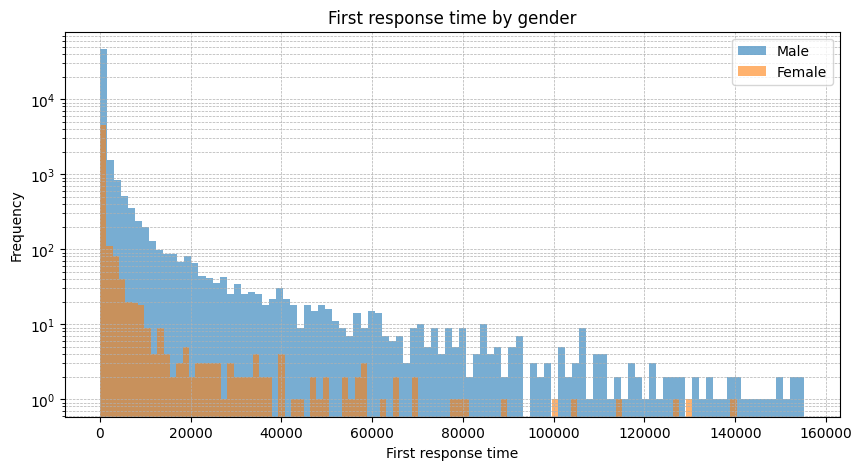

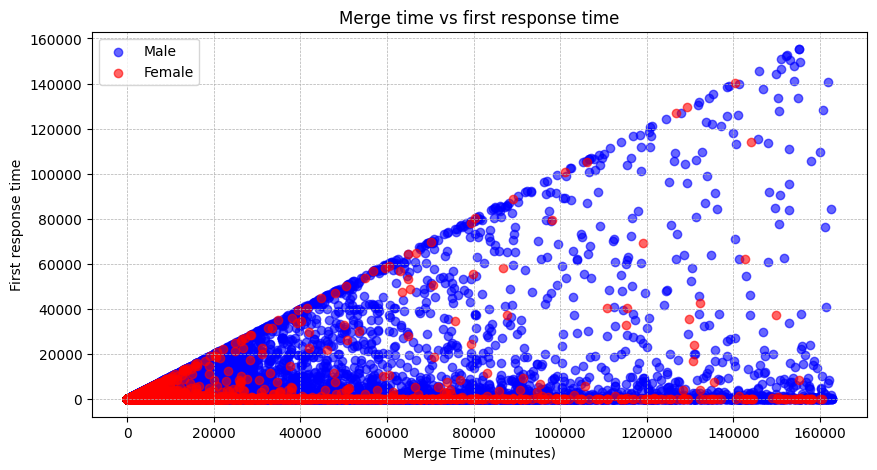

Shapiro-Wilk test for male contributors, first response time: W = 0.1781684904159775, p = 1.5701043670748118e-88
Shapiro-Wilk test for female contributors, first response time: W = 0.14663667486763643, p = 2.1886591447940367e-89
Kruskal-Wallis H test, first response time: H = 327.46257633174594, p = 3.431215485307703e-73
Cliff's delta: 0.1542588760971699, interpretation: small
Mean first response time for male contributors: 1388.9675145631068
Mean first response time for female contributors: 1067.5375430074885
Median first response time for male contributors: 13.0
Median first response time for female contributors: 5.0
Standard deviation of first response time for male contributors: 7473.961547024777
Standard deviation of first response time for female contributors: 6635.74087434665
Maximum first response time for male contributors: 155238.0
Maximum first response time for female contributors: 140304.0
Minimum first response time for male contributors: 0.0
Minimum first response time f

In [50]:
# 6. first response time
plt.figure(figsize=(10, 5))
plt.hist(male['first_response_time'], bins=100, alpha=0.6, label='Male', log=True)
plt.hist(female['first_response_time'], bins=100, alpha=0.6, label='Female', log=True)
plt.xlabel('First response time')
plt.ylabel('Frequency')
plt.legend()
plt.grid(True, which="both", ls="--", linewidth=0.5)
plt.title('First response time by gender')
plt.show()

plt.figure(figsize=(10, 5))
plt.scatter(male['mergetime_minutes'], male['first_response_time'], alpha=0.6, color='blue', label='Male')
plt.scatter(female['mergetime_minutes'], female['first_response_time'], alpha=0.6, color='red', label='Female')
plt.xlabel('Merge Time (minutes)')
plt.ylabel('First response time')
plt.title('Merge time vs first response time')
plt.legend()
plt.grid(True, which="both", ls="--", linewidth=0.5)
plt.show()

sample_size = 4500
male_sample = male['first_response_time'].sample(n=sample_size, random_state=1)
female_sample = female['first_response_time'].sample(n=sample_size, random_state=1)

res_male = shapiro(male_sample[male_sample>=0].dropna())
res_female = shapiro(female_sample[female_sample>=0].dropna())
print('Shapiro-Wilk test for male contributors, first response time: W = {}, p = {}'.format(res_male.statistic, res_male.pvalue))
print('Shapiro-Wilk test for female contributors, first response time: W = {}, p = {}'.format(res_female.statistic, res_female.pvalue))

H, p = kruskal(male['first_response_time'].dropna(), female['first_response_time'].dropna())
print('Kruskal-Wallis H test, first response time: H = {}, p = {}'.format(H, p))

if p < 0.05:
    delta, res = cliffs_delta(male['first_response_time'], female['first_response_time'])
    print('Cliff\'s delta: {}, interpretation: {}'.format(delta, res))
    
print('Mean first response time for male contributors: {}'.format(male['first_response_time'].mean()))
print('Mean first response time for female contributors: {}'.format(female['first_response_time'].mean()))
print('Median first response time for male contributors: {}'.format(male['first_response_time'].median()))
print('Median first response time for female contributors: {}'.format(female['first_response_time'].median()))
print('Standard deviation of first response time for male contributors: {}'.format(male['first_response_time'].std()))
print('Standard deviation of first response time for female contributors: {}'.format(female['first_response_time'].std()))
print('Maximum first response time for male contributors: {}'.format(male['first_response_time'].max()))
print('Maximum first response time for female contributors: {}'.format(female['first_response_time'].max()))
print('Minimum first response time for male contributors: {}'.format(male['first_response_time'].min()))
print('Minimum first response time for female contributors: {}'.format(female['first_response_time'].min()))

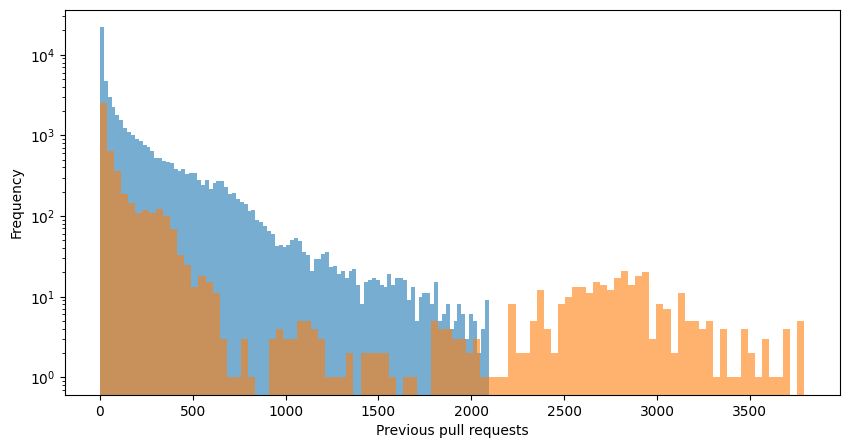

Shapiro-Wilk test for male contributors, previous pr: W = 0.646694576462882, p = 1.9108020543495834e-70
Shapiro-Wilk test for female contributors, previous pr: W = 0.41727387427787654, p = 6.551127681725162e-81
Kruskal-Wallis H test, previous pr: H = 0.08749360876048684, p = 0.7673880272216356
Mean previous pull requests for male contributors: 153.3091067961165
Mean previous pull requests for female contributors: 272.50799433313097
Median previous pull requests for male contributors: 37.0
Median previous pull requests for female contributors: 37.0
Standard deviation of previous for male contributors: 257.63149412176136
Standard deviation of previous for female contributors: 689.5207408127593
Maximum previous pull requests for male contributors: 2093
Maximum previous pull requests for female contributors: 3794
Minimum previous pull requests for male contributors: 0
Minimum previous pull requests for female contributors: 0


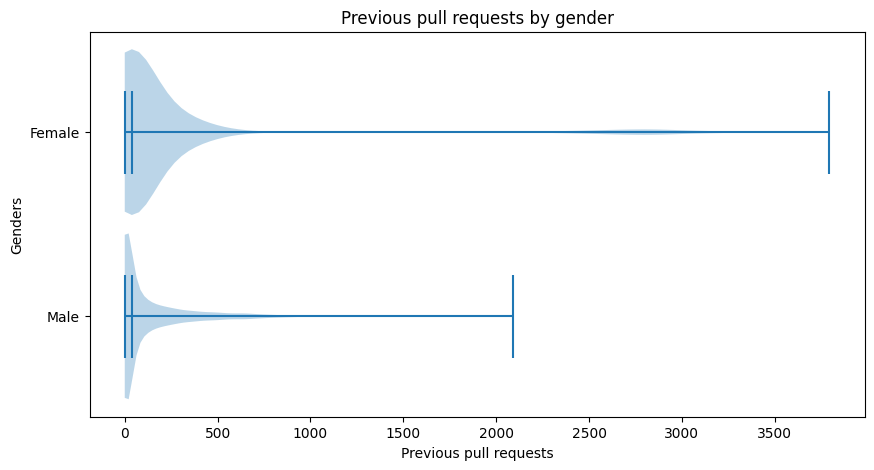

In [51]:
male_prev = male['prev_pullreqs']
female_prev = female['prev_pullreqs']
plt.figure(figsize=(10, 5))
plt.hist(male_prev, bins=100, alpha=0.6, log=True)
plt.hist(female_prev, bins=100, alpha=0.6, log=True)
plt.xlabel('Previous pull requests')
plt.ylabel('Frequency')
plt.show()

sample_size = 4500
male_sample_prev = male_prev.sample(n=sample_size, random_state=1)
female_sample_prev = female_prev.sample(n=sample_size, random_state=1)

res_male_prev = shapiro(male_sample_prev)
res_female_prev = shapiro(female_sample_prev)
print('Shapiro-Wilk test for male contributors, previous pr: W = {}, p = {}'.format(res_male_prev.statistic, res_male_prev.pvalue))
print('Shapiro-Wilk test for female contributors, previous pr: W = {}, p = {}'.format(res_female_prev.statistic, res_female_prev.pvalue))

H, p = kruskal(male_prev, female_prev)
print('Kruskal-Wallis H test, previous pr: H = {}, p = {}'.format(H, p))

if p < 0.05:
    delta, res = cliffs_delta(male_prev, female_prev)
    print('Cliff\'s delta: {}, interpretation: {}'.format(delta, res))

print('Mean previous pull requests for male contributors: {}'.format(male['prev_pullreqs'].mean()))
print('Mean previous pull requests for female contributors: {}'.format(female['prev_pullreqs'].mean()))
print('Median previous pull requests for male contributors: {}'.format(male['prev_pullreqs'].median()))
print('Median previous pull requests for female contributors: {}'.format(female['prev_pullreqs'].median()))
print('Standard deviation of previous for male contributors: {}'.format(male['prev_pullreqs'].std()))
print('Standard deviation of previous for female contributors: {}'.format(female['prev_pullreqs'].std()))
print('Maximum previous pull requests for male contributors: {}'.format(male['prev_pullreqs'].max()))
print('Maximum previous pull requests for female contributors: {}'.format(female['prev_pullreqs'].max()))
print('Minimum previous pull requests for male contributors: {}'.format(male['prev_pullreqs'].min()))
print('Minimum previous pull requests for female contributors: {}'.format(female['prev_pullreqs'].min()))

plt.figure(figsize=(10, 5)) 
plt.violinplot([male_prev, female_prev], vert=False, widths=0.9, showextrema=True, showmedians=True)
plt.title('Previous pull requests by gender')
plt.yticks([1,2], ['Male', 'Female'])
plt.xlabel('Previous pull requests')
plt.ylabel('Genders')
plt.show()

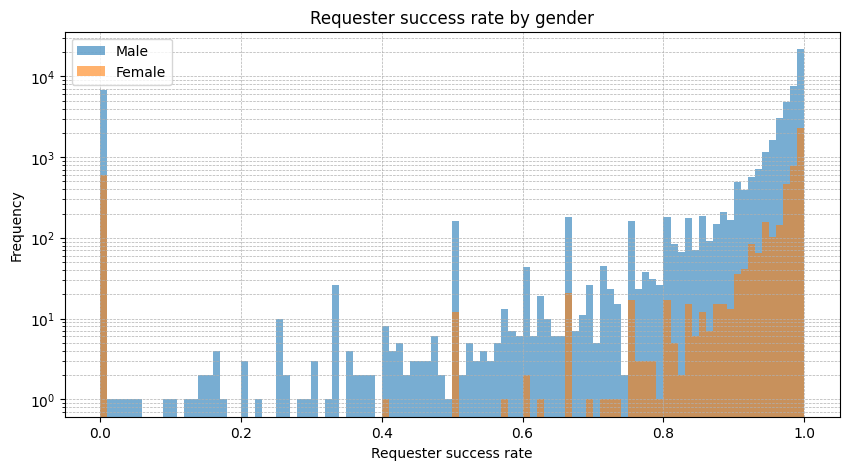

Shapiro-Wilk test for male contributors, success rate until pr: W = 0.4886033160167573, p = 4.1549208618271504e-78
Shapiro-Wilk test for female contributors, success rate until pr: W = 0.4564169941398628, p = 2.064975827403115e-79
Kruskal-Wallis H test, success rate until pr: H = 33.59141201862388, p = 6.799226045875192e-09
Cliff's delta: -0.04854974917620151, interpretation: negligible
Mean success rate until pr for male contributors: 0.8428269496388349
Mean success rate until pr for female contributors: 0.8582090900627404
Median success rate until pr for male contributors: 0.984772
Median success rate until pr for female contributors: 0.985915
Standard deviation of success rate until pr for male contributors: 0.3355709093268517
Standard deviation of success rate until pr for female contributors: 0.32287244965663375
Maximum success rate until pr for male contributors: 1.0
Maximum success rate until pr for female contributors: 1.0
Minimum success rate until pr for male contributors: 0.

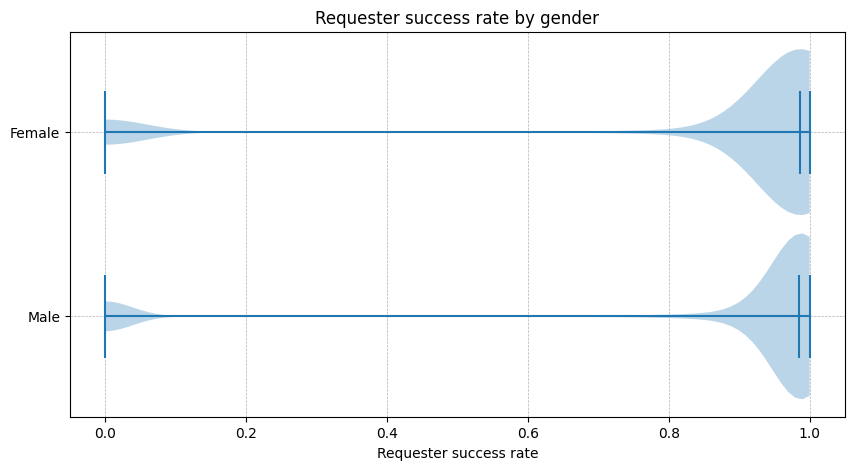

In [52]:
plt.figure(figsize=(10, 5))
plt.hist(male['requester_succ_rate'], bins=100, alpha=0.6, label='Male', log=True)
plt.hist(female['requester_succ_rate'], bins=100, alpha=0.6, label='Female', log=True)
plt.xlabel('Requester success rate')
plt.ylabel('Frequency')
plt.legend()
plt.grid(True, which="both", ls="--", linewidth=0.5)
plt.title('Requester success rate by gender')
plt.show()

plt.figure(figsize=(10, 5))
plt.violinplot([male['requester_succ_rate'], female['requester_succ_rate']], vert=False, widths=0.9, showextrema=True, showmedians=True)
plt.xlabel('Requester success rate')
plt.yticks([1, 2], ['Male', 'Female'])
plt.grid(True, which="both", ls="--", linewidth=0.5)
plt.title('Requester success rate by gender')


sample_size = 4500
male_sample = male['requester_succ_rate'].sample(n=sample_size, random_state=1)
female_sample = female['requester_succ_rate'].sample(n=sample_size, random_state=1)

res_male = shapiro(male_sample)
res_female = shapiro(female_sample)
print('Shapiro-Wilk test for male contributors, success rate until pr: W = {}, p = {}'.format(res_male.statistic, res_male.pvalue))
print('Shapiro-Wilk test for female contributors, success rate until pr: W = {}, p = {}'.format(res_female.statistic, res_female.pvalue))

H, p = kruskal(male['requester_succ_rate'], female['requester_succ_rate'])
print('Kruskal-Wallis H test, success rate until pr: H = {}, p = {}'.format(H, p))

if p < 0.05:
    delta, res = cliffs_delta(male['requester_succ_rate'], female['requester_succ_rate'])
    print('Cliff\'s delta: {}, interpretation: {}'.format(delta, res))

print('Mean success rate until pr for male contributors: {}'.format(male['requester_succ_rate'].mean()))
print('Mean success rate until pr for female contributors: {}'.format(female['requester_succ_rate'].mean()))
print('Median success rate until pr for male contributors: {}'.format(male['requester_succ_rate'].median()))
print('Median success rate until pr for female contributors: {}'.format(female['requester_succ_rate'].median()))
print('Standard deviation of success rate until pr for male contributors: {}'.format(male['requester_succ_rate'].std()))
print('Standard deviation of success rate until pr for female contributors: {}'.format(female['requester_succ_rate'].std()))
print('Maximum success rate until pr for male contributors: {}'.format(male['requester_succ_rate'].max()))
print('Maximum success rate until pr for female contributors: {}'.format(female['requester_succ_rate'].max()))
print('Minimum success rate until pr for male contributors: {}'.format(male['requester_succ_rate'].min()))
print('Minimum success rate until pr for female contributors: {}'.format(female['requester_succ_rate'].min()))

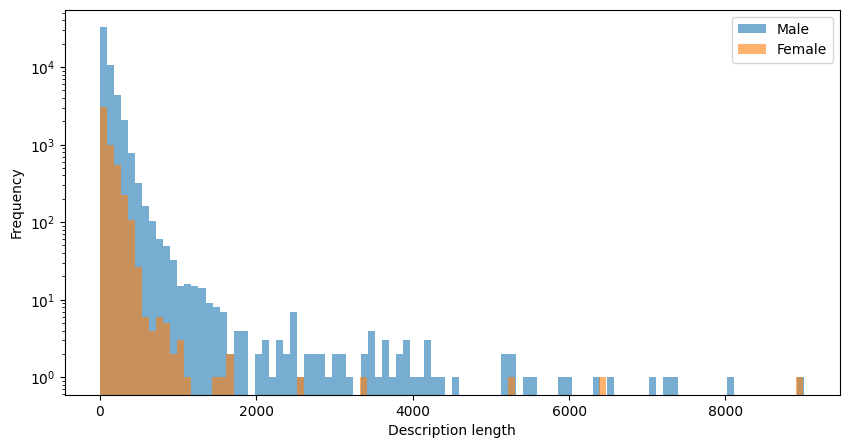

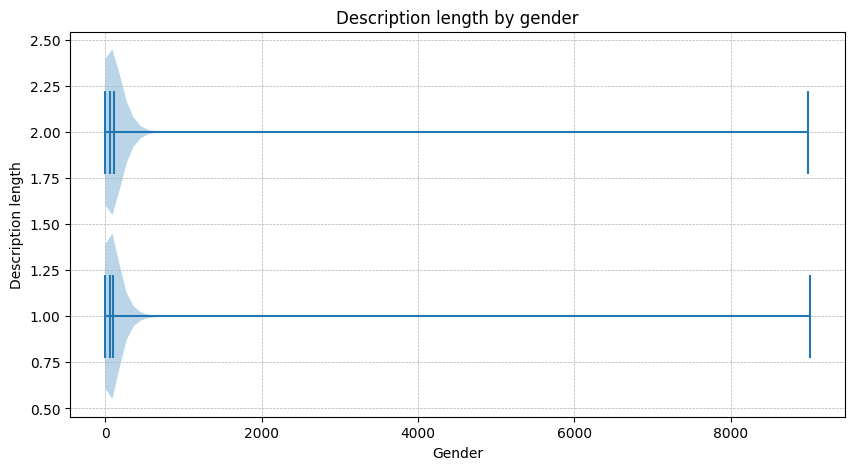

Shapiro-Wilk test for male contributors, description length: W = 0.3956735816284829, p = 1.0621421525348894e-81
Shapiro-Wilk test for female contributors, description length: W = 0.2825541847506037, p = 1.772113036593806e-85
Kruskal-Wallis H test, description length: H = 2.4286158800083157, p = 0.11913805227019006
Mean description length for male contributors: 104.90079611650485
Mean description length for female contributors: 108.54017405383526
Median description length for male contributors: 62.0
Median description length for female contributors: 64.0
Standard deviation of description for male contributors: 189.8738558386558
Standard deviation of description for female contributors: 215.8693164779327
Maximum description length for male contributors: 9009
Maximum description length for female contributors: 8990
Minimum description length for male contributors: 0
Minimum description length for female contributors: 1


In [53]:
plt.figure(figsize=(10, 5))
plt.hist(male['description_length'], bins=100, alpha=0.6, label='Male', log=True)
plt.hist(female['description_length'], bins=100, alpha=0.6, label='Female', log=True)
plt.xlabel('Description length')
plt.ylabel('Frequency')
plt.legend()

plt.figure(figsize=(10, 5))
plt.violinplot([male['description_length'], female['description_length']], vert=False, widths=0.9, showmeans=True, showextrema=True, showmedians=True, bw_method=0.5)
plt.xlabel('Gender')
plt.ylabel('Description length')
plt.title('Description length by gender')
plt.grid(True, which="both", ls="--", linewidth=0.5)
plt.show()

sample_size = 4500
male_sample = male['description_length'].sample(n=sample_size, random_state=1)
female_sample = female['description_length'].sample(n=sample_size, random_state=1)

res_male = shapiro(male_sample)
res_female = shapiro(female_sample)
print('Shapiro-Wilk test for male contributors, description length: W = {}, p = {}'.format(res_male.statistic, res_male.pvalue))
print('Shapiro-Wilk test for female contributors, description length: W = {}, p = {}'.format(res_female.statistic, res_female.pvalue))

H, p = kruskal(male['description_length'], female['description_length'])
print('Kruskal-Wallis H test, description length: H = {}, p = {}'.format(H, p))

if p < 0.05:
    delta, res = cliffs_delta(male['src_files'], female['src_files'])
    print('Cliff\'s delta: {}, interpretation: {}'.format(delta, res))

print('Mean description length for male contributors: {}'.format(male['description_length'].mean()))
print('Mean description length for female contributors: {}'.format(female['description_length'].mean()))
print('Median description length for male contributors: {}'.format(male['description_length'].median()))
print('Median description length for female contributors: {}'.format(female['description_length'].median()))
print('Standard deviation of description for male contributors: {}'.format(male['description_length'].std()))
print('Standard deviation of description for female contributors: {}'.format(female['description_length'].std()))
print('Maximum description length for male contributors: {}'.format(male['description_length'].max()))
print('Maximum description length for female contributors: {}'.format(female['description_length'].max()))
print('Minimum description length for male contributors: {}'.format(male['description_length'].min()))
print('Minimum description length for female contributors: {}'.format(female['description_length'].min()))

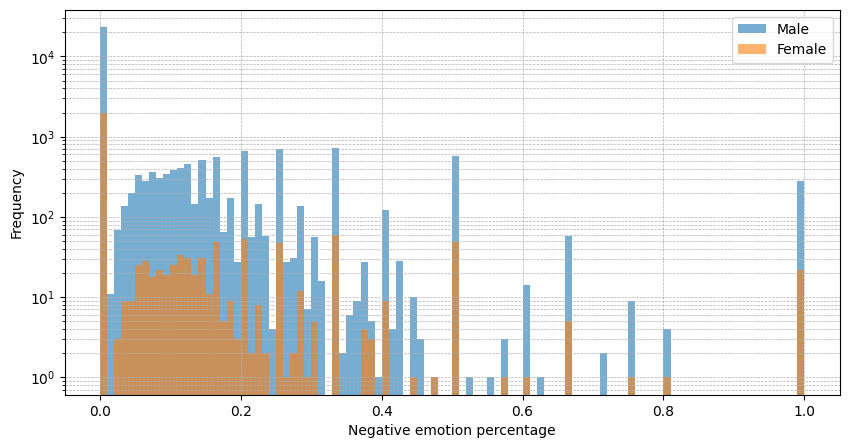

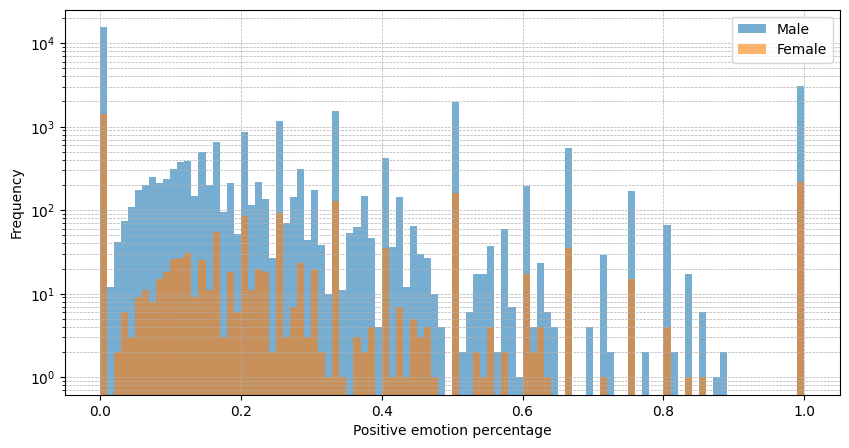

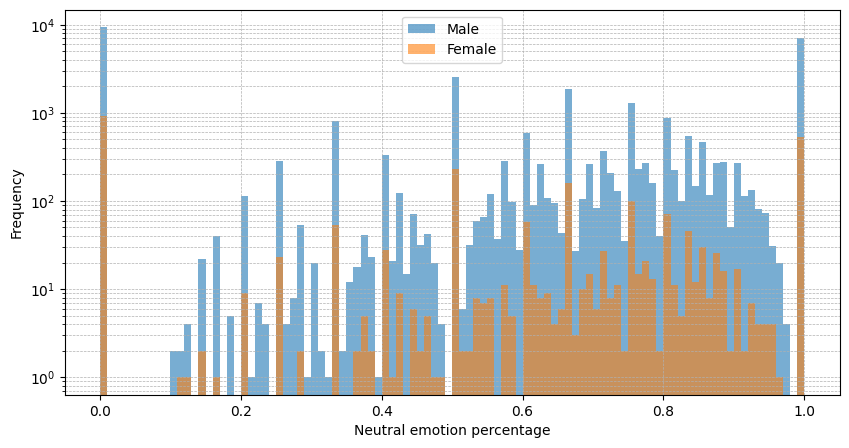

Shapiro-Wilk test for male contributions, negative emotion integrator: W = 0.475829479512067, p = 3.237477978938155e-65
Shapiro-Wilk test for male contributions, positive emotion integrator: W = 0.7326006286326949, p = 4.596616246806026e-53
Shapiro-Wilk test for male contributions, neutral emotion integrator: W = 0.8399677875612459, p = 1.1618117738738764e-44
Shapiro-Wilk test for female contributions, negative emotion integrator: W = 0.4678451408850113, p = 1.6690232278281163e-65
Shapiro-Wilk test for female contributions, positive emotion integrator: W = 0.7040631987028791, p = 8.205071899391021e-55
Shapiro-Wilk test for female contributions, neutral emotion integrator: W = 0.8308286345018894, p = 1.5568713854505074e-45
Kruskal-Wallis H test, negative emotion integrator: H = 9.347412346103514, p = 0.002233005301468428
Cliff's delta: 0.028017070865936262, interpretation: negligible
Kruskal-Wallis H test, positive emotion integrator: H = 16.80808739639274, p = 4.1356674479718294e-05
Cl

In [54]:
# emotion
neg_male = male['perc_neg_emotion'].dropna()
pos_male = male['perc_pos_emotion'].dropna()
neu_male = male['perc_neu_emotion'].dropna()

neg_female = female['perc_neg_emotion'].dropna()
pos_female = female['perc_pos_emotion'].dropna()
neu_female = female['perc_neu_emotion'].dropna()

plt.figure(figsize=(10, 5))
plt.hist(neg_male, bins=100, alpha=0.6, label='Male', log=True)
plt.hist(neg_female, bins=100, alpha=0.6, label='Female', log=True)
plt.xlabel('Negative emotion percentage')
plt.ylabel('Frequency')
plt.legend()
plt.grid(True, which="both", ls="--", linewidth=0.5)
plt.show()

plt.figure(figsize=(10, 5))
plt.hist(pos_male, bins=100, alpha=0.6, label='Male', log=True)
plt.hist(pos_female, bins=100, alpha=0.6, label='Female', log=True)
plt.xlabel('Positive emotion percentage')
plt.ylabel('Frequency')
plt.legend()
plt.grid(True, which="both", ls="--", linewidth=0.5)
plt.show()

plt.figure(figsize=(10, 5))
plt.hist(neu_male, bins=100, alpha=0.6, label='Male', log=True)
plt.hist(neu_female, bins=100, alpha=0.6, label='Female', log=True)
plt.xlabel('Neutral emotion percentage')
plt.ylabel('Frequency')
plt.legend()
plt.grid(True, which="both", ls="--", linewidth=0.5)
plt.show()

sample_size = 2500
male_sample_neg = neg_male.sample(n=sample_size, random_state=1)
male_sample_pos = pos_male.sample(n=sample_size, random_state=1)
male_sample_neu = neu_male.sample(n=sample_size, random_state=1)

female_sample_neg = neg_female.sample(n=sample_size, random_state=1)
female_sample_pos = pos_female.sample(n=sample_size, random_state=1)
female_sample_neu = neu_female.sample(n=sample_size, random_state=1)

res_male_neg = shapiro(male_sample_neg)
res_male_pos = shapiro(male_sample_pos)
res_male_neu = shapiro(male_sample_neu)

print('Shapiro-Wilk test for male contributions, negative emotion integrator: W = {}, p = {}'.format(res_male_neg.statistic, res_male_neg.pvalue))
print('Shapiro-Wilk test for male contributions, positive emotion integrator: W = {}, p = {}'.format(res_male_pos.statistic, res_male_pos.pvalue))
print('Shapiro-Wilk test for male contributions, neutral emotion integrator: W = {}, p = {}'.format(res_male_neu.statistic, res_male_neu.pvalue))

res_female_neg = shapiro(female_sample_neg)
res_female_pos = shapiro(female_sample_pos)
res_female_neu = shapiro(female_sample_neu)

print('Shapiro-Wilk test for female contributions, negative emotion integrator: W = {}, p = {}'.format(res_female_neg.statistic, res_female_neg.pvalue))
print('Shapiro-Wilk test for female contributions, positive emotion integrator: W = {}, p = {}'.format(res_female_pos.statistic, res_female_pos.pvalue))
print('Shapiro-Wilk test for female contributions, neutral emotion integrator: W = {}, p = {}'.format(res_female_neu.statistic, res_female_neu.pvalue))

H, p = kruskal(neg_male, neg_female)
print('Kruskal-Wallis H test, negative emotion integrator: H = {}, p = {}'.format(H, p))

if p < 0.05:
    delta, res = cliffs_delta(neg_male, neg_female)
    print('Cliff\'s delta: {}, interpretation: {}'.format(delta, res))

H, p = kruskal(pos_male, pos_female)
print('Kruskal-Wallis H test, positive emotion integrator: H = {}, p = {}'.format(H, p))

if p < 0.05:
    delta, res = cliffs_delta(pos_male, pos_female)
    print('Cliff\'s delta: {}, interpretation: {}'.format(delta, res))

H, p = kruskal(neu_male, neu_female)
print('Kruskal-Wallis H test, neutral emotion integrator: H = {}, p = {}'.format(H, p))

if p < 0.05:
    delta, res = cliffs_delta(neu_male, neu_female)
    print('Cliff\'s delta: {}, interpretation: {}'.format(delta, res))